### BUSINESS UNDERSTANDING 

##### Problem Statement

Syriatel, a telecommunication company in Syria are worried of losing customers recently and it seems to get worse overtime.To try and fix this, the project aims to analyze customer data and create machine learning models to identify those at risk of churning,while keeping focus on the main goal of achieving accurate predictions.By understanding why customers leave, Syriatel can hopefully improve their services and improve on customer retention which in turn will attract new clients by effectively allocating resources based on the predictions.

#### Objectives

1. Find reasons behind churning
2. To create models to predict future rate of churning accurately.
3. Find solutions to curb churning 

#### Performance Metric

1. To develop prediction model  with recall score which is a key perfomance metrics to ensure the predictions are meaningful.
2. To point out on features that significally leads to churning 
3. Provide solutions to the company which will have an impact on churning and improve on customer retention.

### DATA UNDERSTANDING

In [5]:
# Importing necessary modules and packages

#for data analysis and manipulation
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set_style("darkgrid")

# Display plots in the notebook
%matplotlib inline

#Modelling and supervised learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC

#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#load data
data = pd.read_csv('churn_telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data preparation

In [9]:
# duplicates and missing values
duplicated = data.duplicated().sum()

missing_values = data.isna().sum()

#Display the total number of duplicate values and missing_values
print("Duplicated values are:", duplicated)
print("Missing values are:\n", missing_values)

Duplicated values are: 0
Missing values are:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [10]:
# Converting string-based categorical values to integer-based categorical representations 0 and 1.
intl_plan = {'yes': 1, 'no': 0}
vm_plan = {'yes': 1, 'no': 0}
churn_status = {True: 1, False: 0}

#Display the replacement of each column
data['international plan'].replace(intl_plan, inplace=True)
data['voice mail plan'].replace(vm_plan, inplace=True)
data['churn'].replace(churn_status, inplace=True)

In [11]:
data.sample(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3174,SC,36,408,359-5091,0,1,43,29.9,123,5.08,...,117,10.97,325.9,105,14.67,8.6,6,2.32,2,0
2687,MN,125,415,390-9735,1,1,29,260.8,81,44.34,...,112,13.91,271.7,117,12.23,17.0,6,4.59,1,1
2176,UT,93,415,337-9710,0,0,0,164.9,68,28.03,...,86,17.88,229.4,104,10.32,7.8,4,2.11,2,0
670,WV,32,408,370-7565,0,1,26,266.7,109,45.34,...,107,19.75,212.8,98,9.58,16.3,4,4.40,1,0
2442,ID,82,510,405-7204,0,1,34,232.6,121,39.54,...,115,13.02,286.7,77,12.90,4.7,3,1.27,3,0
3245,OR,89,415,343-3399,0,0,0,111.2,101,18.90,...,94,10.38,180.8,85,8.14,12.6,2,3.40,3,0
345,VA,141,415,333-7749,0,0,0,260.2,131,44.23,...,120,15.23,135.0,119,6.08,7.2,8,1.94,3,0
377,ND,79,408,363-3515,0,0,0,205.7,123,34.97,...,108,18.23,226.1,106,10.17,6.7,18,1.81,1,0
2143,MA,79,415,419-2767,0,0,0,156.9,109,26.67,...,87,10.39,189.1,103,8.51,11.3,5,3.05,3,0
1589,AK,76,415,404-1931,0,0,0,143.7,55,24.43,...,108,14.71,239.1,95,10.76,5.8,6,1.57,1,0


In [12]:
#charges, calls and minutes totals

data['total_charges'] = round(data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge'])
data['total_calls'] = round(data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls'])
data['total_minutes'] = round(data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes'])

In [13]:
print(data[['total_charges', 'total_calls','total_minutes']].sample(10))

      total_charges  total_calls  total_minutes
1977           70.0          303          630.0
2368           65.0          277          585.0
3              67.0          255          565.0
829            61.0          213          559.0
1837           45.0          270          538.0
3143           47.0          385          523.0
2990           53.0          318          523.0
2399           51.0          281          450.0
3016           62.0          357          614.0
417            68.0          285          634.0


In [14]:
#Display 10 random entries to confirm changes
data.sample(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_charges,total_calls,total_minutes
1956,MS,107,510,352-6282,0,1,30,198.9,87,33.81,...,76,7.19,12.6,4,3.40,3,0,62.0,257,578.0
3019,TX,169,408,379-5885,0,0,0,266.7,105,45.34,...,111,12.95,13.8,3,3.73,3,1,75.0,307,726.0
1260,AK,76,415,366-9781,0,1,22,160.1,107,27.22,...,102,1.04,9.5,4,2.57,3,0,45.0,349,361.0
2847,ID,119,415,338-9952,1,1,32,173.0,101,29.41,...,91,10.40,12.2,4,3.29,0,0,61.0,289,626.0
2702,VT,152,510,333-9664,0,1,20,214.6,108,36.48,...,145,7.68,7.9,5,2.13,1,0,54.0,340,490.0
2608,IN,81,408,347-6717,0,1,46,168.3,124,28.61,...,98,10.01,6.7,2,1.81,4,0,63.0,327,668.0
278,AL,131,415,361-7998,0,1,25,192.7,85,32.76,...,59,11.44,10.9,6,2.94,2,0,66.0,255,684.0
2844,NH,161,415,349-4397,0,0,0,173.4,100,29.48,...,69,6.37,11.5,4,3.11,1,0,57.0,247,540.0
802,FL,84,510,341-3180,0,0,0,191.0,88,32.47,...,79,11.13,6.5,4,1.76,0,0,72.0,290,764.0
2685,OR,64,510,407-6391,0,0,0,213.5,93,36.30,...,78,5.49,14.1,3,3.81,3,0,60.0,288,516.0


#### Create copy of Data

In [15]:


#Assuming 'data' as our Dataframe
data_copy = data.copy()

#columns to drop
columns_to_drop = ['phone number','total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls','total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Using the drop method with 'columns' parameter
data_copy = data_copy.drop(columns=columns_to_drop)

# Print a sample of the modified DataFrame
data_copy.sample(10)


,state,account length,area code,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes
233,NV,53,415,0,0,0,0,0,57.0,299,554.0
3117,OR,113,415,0,0,0,2,0,56.0,329,558.0
126,MS,162,415,0,0,0,4,1,35.0,280,392.0
3041,RI,39,408,0,0,0,0,0,44.0,305,506.0
32,LA,172,408,0,0,0,3,0,55.0,324,549.0
4,OK,75,415,1,0,0,3,0,52.0,359,512.0
2664,NM,188,415,1,1,26,1,1,61.0,303,578.0
1730,NM,161,408,0,0,0,2,0,55.0,301,624.0
1059,NM,174,415,0,0,0,1,0,64.0,315,542.0
2324,LA,124,510,0,0,0,4,1,56.0,324,596.0


#### Univariet Analysis

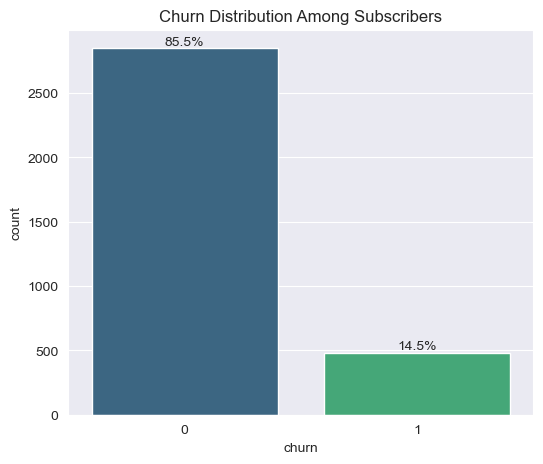

In [16]:
# Churn distribution among subscribers
#Setting  figure size
plt.figure(figsize=(6, 5))
#Creating a countplot using seaborn
ax = sns.countplot(x='churn', data=data, palette='viridis')
#total number of data points
total = len(data['churn'])

#Adding percentage annotation for each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

#Set title for plot
plt.title("Churn Distribution Among Subscribers")
plt.show()

In [17]:
#Generates a pie chart displaying the area code feature in the dataset
# for easy interpretetion  of relative frequencies of different area code
# Pie chart of area code feature
area = data['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(data,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

##### Bivariet Analysis

In [18]:
# bar plot using Plotly Express
fig = px.histogram(data_copy, x='state', color='churn', barmode='group',
                   title='Churn Distribution Across States',
                   labels={'state': 'State', 'count': 'Count', 'churn': 'Churn'},
                   color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(xaxis_title='State',
                  yaxis_title='Count',
                  legend_title='Churn')

# Show the plot
fig.show()

In [19]:
# Calculate the total number of churns for each state
# Calculate the total number of churns for each state
state_churn_counts = data.groupby('state')['churn'].sum()

# Find the top 5 states with the highest churn counts
top_5_states = state_churn_counts.sort_values(ascending=False).head(5).index

# Filter the data for the top 5 states
top_5_data = data[data['state'].isin(top_5_states)]

# Create a bar plot using Plotly Express
fig = px.histogram(top_5_data, x='state', color='churn', barmode='group',
                   title='Churn Distribution Across Top 5 States',
                   labels={'state': 'State', 'count': 'Count', 'churn': 'Churn'},
                   color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(xaxis_title='State',
                  yaxis_title='Count',
                  legend_title='Churn')

# Show the plot
fig.show()

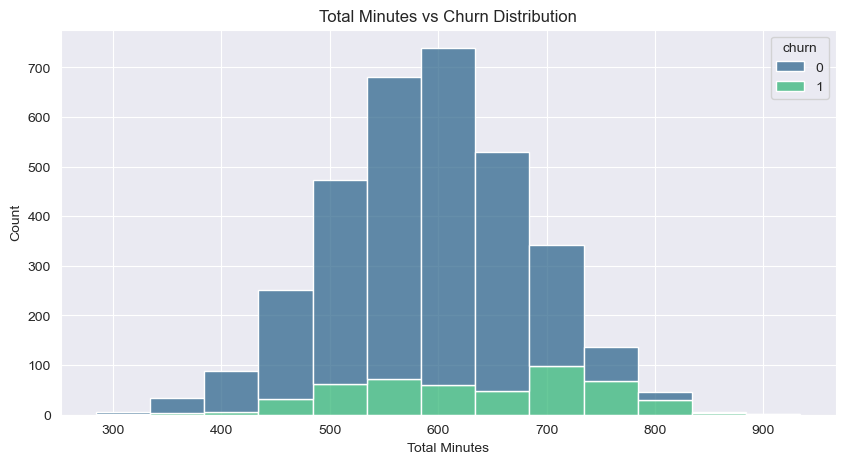

In [20]:
# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot the stacked bar plot
sns.histplot(data=data_copy, x='total_minutes', hue='churn', multiple='stack', binwidth=50, palette='viridis')

# Add labels and title
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.title('Total Minutes vs Churn Distribution')

# Show the plot
plt.show()

In [21]:
import plotly.figure_factory as ff
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=[float, int])

# Calculate the correlation matrix using the corr() method
correlation_matrix = numeric_data.corr()

# Create a heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Reds'
)

# Update layout for better readability
fig.update_layout(title='Correlation Matrix', xaxis_nticks=36)

# Show the plot
fig.show()

Multicollinerity occurs when two or more features in the dataset are highly correlated with each other which can cause issues during modeling such as instability , overfiting  or inaccurate coefficient estimates.

## MODELLING

In [22]:
#Onehote encoding for our categorcial features
data_copy = pd.get_dummies(data_copy, columns=['state','area code'], drop_first=True)

In [23]:
data_copy.sample(10)

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes,state_AL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
121,41,0,1,22,0,0,57.0,314,505.0,False,...,True,False,False,False,False,False,False,False,False,False
2480,105,1,0,0,3,0,65.0,301,705.0,False,...,False,False,False,False,False,False,False,False,True,False
2847,119,1,1,32,0,0,61.0,289,626.0,False,...,False,False,False,False,False,False,False,False,True,False
3093,27,0,0,0,2,1,75.0,326,752.0,False,...,False,False,False,False,False,False,False,False,False,True
870,123,0,0,0,0,0,55.0,338,630.0,False,...,False,False,False,False,False,False,False,False,False,False
1636,65,0,1,29,1,0,66.0,287,699.0,False,...,False,False,False,False,False,False,False,False,False,True
2365,112,0,1,29,1,0,70.0,310,738.0,False,...,False,False,True,False,False,False,False,False,False,False
2751,128,0,0,0,0,0,64.0,278,649.0,False,...,False,False,False,False,False,False,False,False,True,False
1498,50,0,0,0,0,0,64.0,308,674.0,False,...,False,False,False,False,False,False,False,False,False,False
961,97,0,0,0,0,0,72.0,245,693.0,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:

#Scale the transform the data to avoid any interference from outliers
scaler = MinMaxScaler()

#iterate over the numerical columns in the data_copy set a scale of -1 to 1
def scaling(columns):
    return scaler.fit_transform(data_copy[columns].values.reshape(-1,1))
for i in data_copy.select_dtypes(include=[np.number]).columns:
    data_copy[i] = scaling(i)
# Display 10 samples
data_copy.sample(10)

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes,state_AL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
2344,0.388430,0.0,0.0,0.000000,0.111111,0.0,0.534247,0.546667,0.489185,False,...,False,False,False,False,False,False,False,False,True,False
1186,0.533058,0.0,1.0,0.235294,0.000000,0.0,0.438356,0.484444,0.484193,False,...,False,False,False,False,False,False,False,False,True,False
1308,0.355372,0.0,0.0,0.000000,0.000000,0.0,0.479452,0.680000,0.460899,False,...,False,False,True,False,False,False,False,False,True,False
2265,0.516529,0.0,1.0,0.607843,0.000000,0.0,0.794521,0.355556,0.797005,False,...,False,False,False,False,False,False,False,False,True,False
2531,0.739669,0.0,0.0,0.000000,0.111111,0.0,0.383562,0.653333,0.389351,False,...,False,False,False,False,False,False,False,False,True,False
1690,0.714876,0.0,1.0,0.294118,0.111111,0.0,0.630137,0.822222,0.637271,False,...,False,False,False,False,False,False,False,False,True,False
1569,0.297521,0.0,1.0,0.607843,0.000000,0.0,0.520548,0.488889,0.545757,False,...,False,False,False,False,False,False,False,False,True,False
1982,0.512397,0.0,0.0,0.000000,0.000000,0.0,0.534247,0.293333,0.572379,False,...,False,False,False,False,False,False,False,False,True,False
2024,0.652893,0.0,1.0,0.450980,0.222222,0.0,0.438356,0.373333,0.432612,False,...,False,False,False,False,False,False,False,False,True,False
2124,0.173554,0.0,0.0,0.000000,0.333333,0.0,0.150685,0.542222,0.322795,False,...,False,False,False,False,False,False,False,False,True,False


##### train test split

In [25]:

#Defining X(independent variables) and y(target variable)
X = data_copy.drop("churn", axis=1)
y = data_copy["churn"]

In [26]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

##### SMOTE technique

In [27]:
#SMOTE to fix the class imbalancemnt found during the decison tree classification

#instantiate SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

##### Logistic Regression

In [28]:
#logistic regression
logreg =LogisticRegression(random_state=42)

In [29]:
#fit the model
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels
y_pred_log = logreg.predict(X_test)

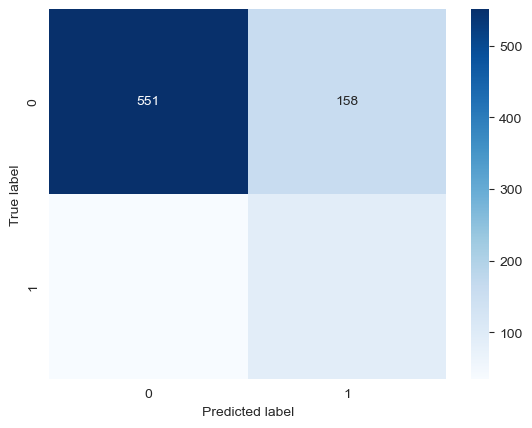

In [30]:

def plot_confusion_matrix(y_true, y_pred, classes):
    #plots confusion matrix

    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [31]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       709
         1.0       0.36      0.72      0.48       125

    accuracy                           0.77       834
   macro avg       0.65      0.75      0.67       834
weighted avg       0.85      0.77      0.80       834



The classification report of the logistic model in summary:

 Non-Churners Class 0.0: The model performs well, indicating it can reliably identify recall of 78% non-churners and 72 for churn instances

Had an accuracy of 77% which is not enough so hence we try another type of model.

Churners Class 1.0: The model has room for improvement, particularly in precision, which could be crucial for business decisions aimed at retaining customers.
>>

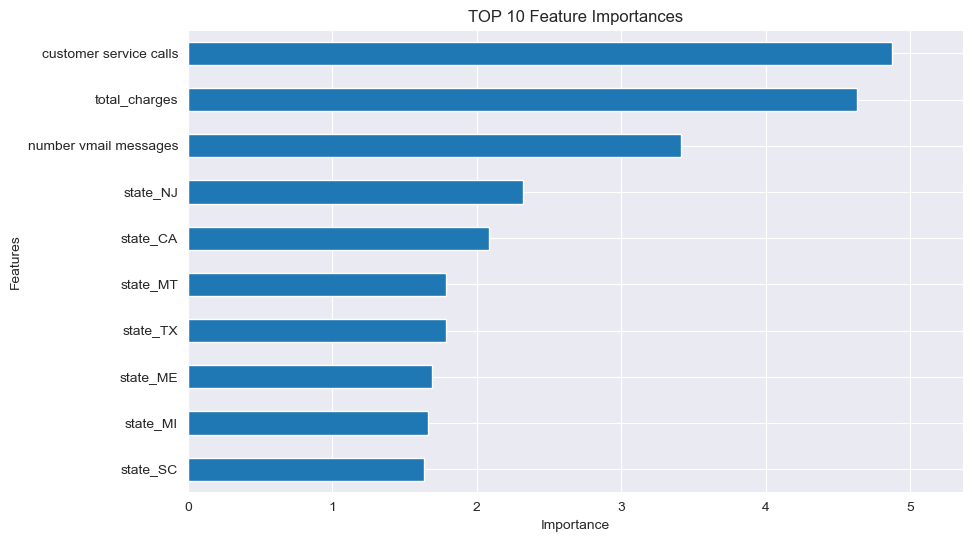

In [32]:
#Feature Importance in the logistics Regression

importance_logreg = logreg.coef_[0]
Feature_names = resampled_X_train.columns
Feature_importances = pd.Series(importance_logreg,index=Feature_names)
Feature_importances = Feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_features = Feature_importances[:10] #selecting the top 10
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('TOP 10 Feature Importances')
plt.xlim(0, max(top_features)*1.1) #setting nthe xlim to the max importance vakue
plt.show()

##### Decision Tree Classification

Accuracy:0.88

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       709
         1.0       0.59      0.75      0.66       125

    accuracy                           0.88       834
   macro avg       0.77      0.83      0.80       834
weighted avg       0.90      0.88      0.89       834


Confusion Matrix:
[[644  65]
 [ 31  94]]


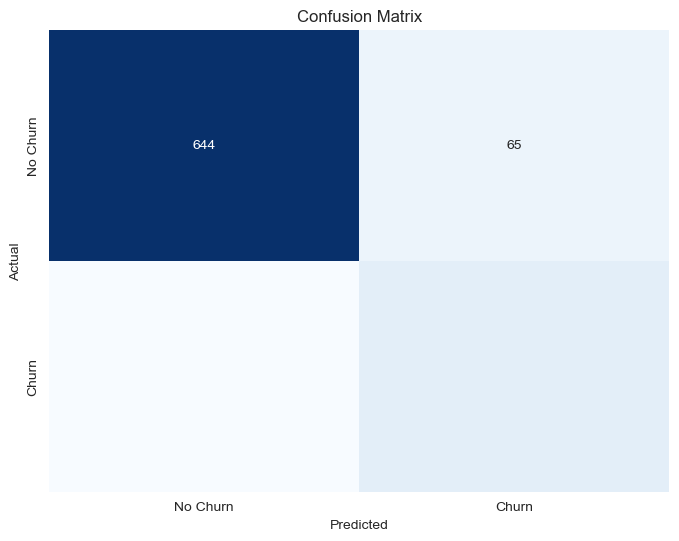

In [33]:
#Decision Tree 

#create the decision tree
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier on the training data
clf.fit(resampled_X_train, resampled_y_train)

#Make predicitons on the testing data
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

#Dsiplay the classification report and confusion matrix
print('\nClassfication Report:')
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(cm, index=['No Churn', 'Churn'],columns=['No Churn', 'Churn'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification reprt of Decision TRee summary:

The model performs well in preddicting No churn instances, with high precision of 95% and recall of 91%

For churn predictions precision is lower 59% which  indicates a higher rate of false positives but we still have a reasonable recall of 75%

The model has an overall accuracy of 88% which suggest a good performance generally

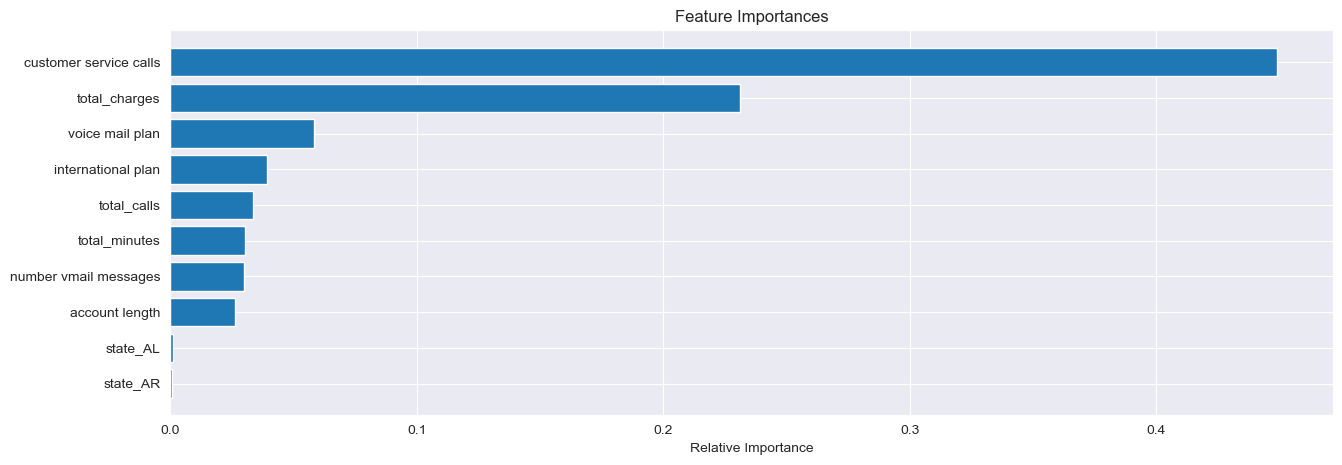

In [34]:
#Feature Importance in the Decision Tree

column_names = list(resampled_X_train.columns)
importances = clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Random Tree Classifier

In [35]:
#Random forest classifier
#Instantiate the classifier
rf = RandomForestClassifier(random_state=42)
#Fit on the training data
rf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=42)

In [36]:
#predict on the test data
y_pred_rf = rf.predict(X_test)

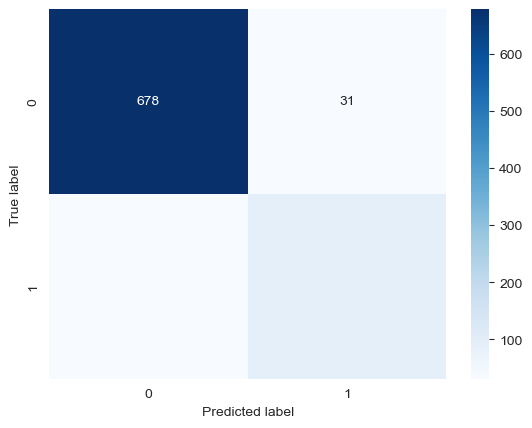

In [37]:
#rf confusion matrix

plot_confusion_matrix(y_test, y_pred_rf,[0,1])

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       709
         1.0       0.75      0.74      0.74       125

    accuracy                           0.92       834
   macro avg       0.85      0.85      0.85       834
weighted avg       0.92      0.92      0.92       834



Classification report of Random Tree Classifier summary:

The model performs well, with high precision for both classes the no churn and churn

No churn instances are well identified with high recall of 96% and percision is also high at 95%

For Churn predictions recall is 74% indicating that the model identified  74% of the actual churn instances. Percision for churn is also high at 75%

overall accuracy is at 92% suggest a good overall performance 

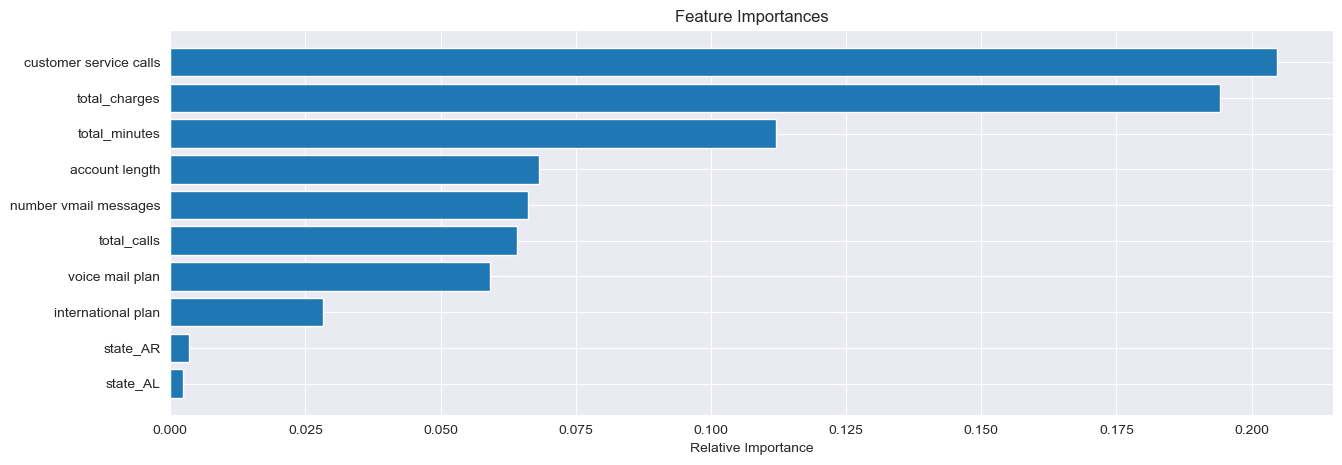

In [39]:
column_names = list(resampled_X_train.columns)
importances = rf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## EVALUATION

This part will evaluate models  on recall score and ROC_AUC to be able to tell what model is best amd tuning for better perfomance 

##### Recall Score

To measure positive instances the model correctly identifies. The higher recall score the better the mdel.

In [40]:
np.random.seed(42)

classifiers = [LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'recall'])

results_list = []
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred, average='binary')
    
    results_list.append({'classifiers': cls.__class__.__name__,
                         'recall': recall})

result_table = pd.concat([result_table, pd.DataFrame(results_list)], ignore_index=True)
result_table.set_index('classifiers', inplace=True)

print(result_table)

                        recall
classifiers                   
LogisticRegression       0.720
DecisionTreeClassifier   0.752
RandomForestClassifier   0.752


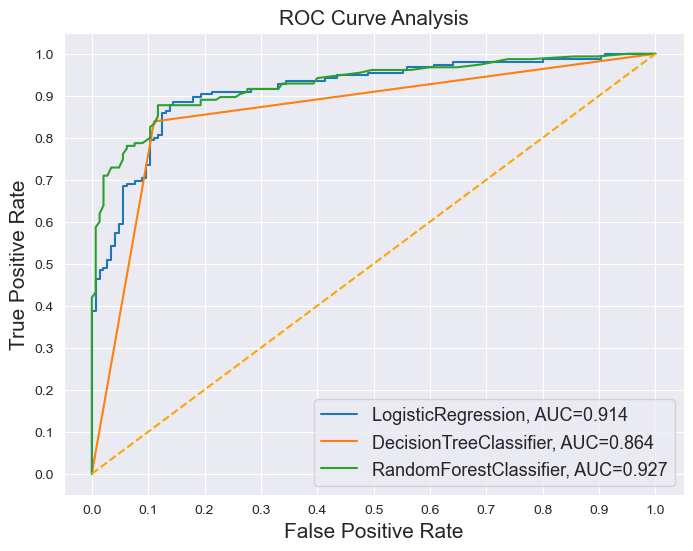

In [41]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
resampled_X_train, X_test, resampled_y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = [LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
results_list = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    results_list.append({'classifiers': cls.__class__.__name__,
                         'fpr': fpr.tolist(), 
                         'tpr': tpr.tolist(), 
                         'auc': auc})

# Convert the list of results into a DataFrame
result_table = pd.DataFrame(results_list)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the ROC curves
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

  The RandomForestClassifer according to our ROC curve is the best performing model compared against the others  with a score of 0.927 and the lowest being a score of 0.864 that being the LogistiRegression

  According to our binary classifier the ROC curve illustrates the trade-off between true positive rate (TPR) and false positive rate (FPR)

  TPR for positives instances correctly classified

  FPR for negative instances incorrectly classified as positives

##### Model Tuning

To improve on our model perfomance  we need to carry out model tuning from the evaluation section RandomForestClassification

In [42]:
#Tuning RandomForestClassification

#Define the grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [15, 20, 35],
    "min_samples_split":[5, 10, 15],
    "min_samples_leaf":[2, 4, 10],
    "criterion":['entropy','gini']
}

#Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring="recall", cv=5, n_jobs=-1)
grid_search.fit(resampled_X_train, resampled_y_train)
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
#Evaluate
y_pred_grid = best_rf_classifier.predict(X_test)
#Display parameters
print("Best Parameters:", best_params)

#Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



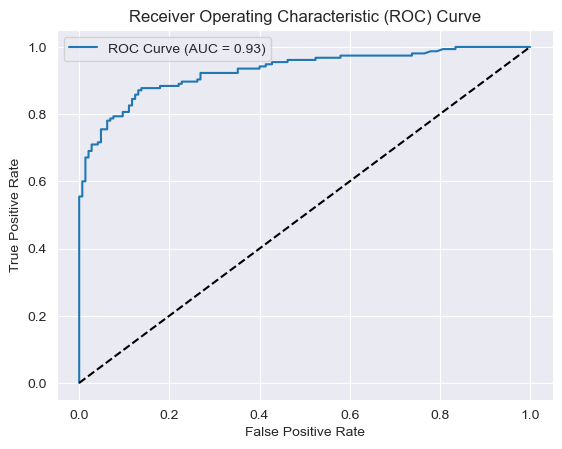

In [43]:
# predicted probabilities for the positive class
y_prob_grid = best_rf_classifier.predict_proba(X_test)[:, 1]

#The false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_grid)

# AUC score
auc_score = roc_auc_score(y_test, y_prob_grid)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

our model identified  90% recall score of actual churn instance which is pretty good 

                  Feature  Importance
6             total_calls    0.384179
2           total_minutes    0.210568
8           area code_510    0.120321
0  customer service calls    0.115930
5          account length    0.033704
4         voice mail plan    0.029235
9           area code_415    0.028676
3   number vmail messages    0.028585
1           total_charges    0.025850
7      international plan    0.022953


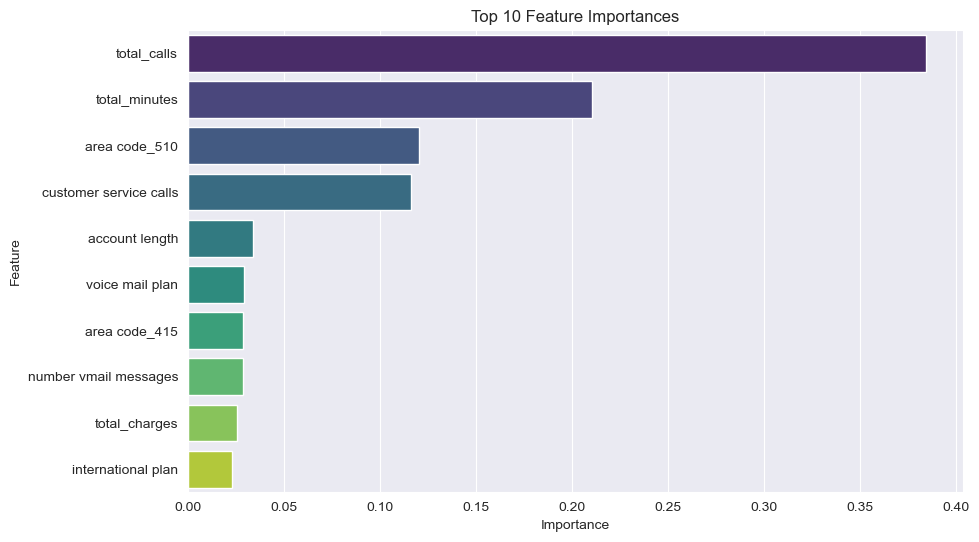

In [46]:

# Fit a RandomForestClassifier
tuned_rf_classifier = RandomForestClassifier(random_state=42)
tuned_rf_classifier.fit(X_train, y_train)

# Actual feature names 
feature_names = [
    'customer service calls', 'total_charges', 'total_minutes',
    'number vmail messages', 'voice mail plan', 'account length',
    'total_calls', 'international plan', 'area code_510', 'area code_415'
]

# Get feature importance
feature_importances = tuned_rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print(top_features)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the top 10 features
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add titles and labels
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

our predictive model has a recall score of 90% which is good

##### Reccomendations

Ways on how syriatel can reduce on churning rate:

They should focus on customer service calls  to improve retention

They should consider promoting international plans to customers with frequent international calls

They should potentially adjust pricing strategies to curb churning

On account length they should reward long term customers to enhance loyality

Analyze regional difference abetween area code 510 and area code 415 and customize services for these area code